# Lending Club Case Study

## Lending Club Case Problem Statement
##### - Identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss.
##### - Identify the variables that affect the loan default.
##### - Identify the relationship between variables of the dataset.
##### - Understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
##### - Understand the riskiest loan applicants based on the driver variables.
##### - Perform a segmentation of the population into low/medium/high risk categories. 

In [1]:
# Importing all libraries required.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Set the decimal places to 2
pd.options.display.float_format = '{:.2f}'.format

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Read the data
df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Print the first 5 rows of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Check the shape of the data
df.shape
# There are 39717 rows and 111 columns

(39717, 111)

In [6]:
# Understanding the data
df.dtypes
# Data types are logical, except for the issue_d column, which is a string

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data Preparation and Cleaning

1. Get an understanding of how many columns are there
2. Understand how many columns have most amount of null which cannot be taken into consideration

In [7]:
# Analyze the data and find the missing values
(df.isnull().sum()/len(df.index))*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [8]:
# Find the missing values in the columns and drop the columns having more than 90% missing values.
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
# Drop columns with more than 90% missing values
df.drop(missing_columns, axis=1, inplace=True)

In [ ]:
# Check the info of the dataframe
df.info()

### Customer behaviour variables (to be removed)
The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Variables such as acc_now_delinquent, chargeoff within 12 months etc. (which are related to the applicant's past loans) are available from the credit bureau.



In [11]:
# Customer behaviour variables (to be removed)
# Note: These variables are not available at the time of loan application
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [12]:
# Drop the behaviour variables
df.drop(behaviour_var, axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# Check the variance of the data
df.var()

id                           44392017644.89
member_id                    70584963034.32
loan_amnt                       55601937.84
funded_amnt                     51656399.70
funded_amnt_inv                 50814805.66
installment                        43628.71
annual_inc                    4069644553.68
dti                                   44.60
mths_since_last_delinq               484.88
collections_12_mths_ex_med             0.00
policy_code                            0.00
acc_now_delinq                         0.00
chargeoff_within_12_mths               0.00
delinq_amnt                            0.00
pub_rec_bankruptcies                   0.04
tax_liens                              0.00
dtype: float64

In [15]:
# Drop columns with least variance
# Drop id and member_id columns as they are unique for each row
df.drop(['id','member_id','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med'],axis=1,inplace=True)

In [16]:
df.info()
# There are 26 columns and 39717 rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [17]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus dropping these variables

df = df.drop(['title', 'url', 'zip_code', 'addr_state','desc'], axis=1)

In [18]:
df.info()
# Now there are 21 columns and 39717 rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [19]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,mths_since_last_delinq,initial_list_status,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,24000.00,Verified,Dec-11,Fully Paid,n,credit_card,27.65,NaN,f,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,30000.00,Source Verified,Dec-11,Charged Off,n,car,1.00,NaN,f,0.00
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,12252.00,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,NaN,f,0.00
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,49200.00,Source Verified,Dec-11,Fully Paid,n,other,20.00,35.00,f,0.00
4,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,80000.00,Source Verified,Dec-11,Current,n,other,17.94,38.00,f,0.00


In [20]:
df.shape

(39717, 21)

#### check for any duplicate rows on id column

In [21]:
df.loc[df.duplicated()].head(5)

# No duplicate rows found

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,mths_since_last_delinq,initial_list_status,pub_rec_bankruptcies


#### Clean up the percentage columns

In [22]:
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

# also, lets extract the numeric part from the variable employment length
# first, let's drop the missing values from the column (otherwise the regex code below throws error)
df = df[~df['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [23]:
# check the loan status variable
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [24]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [25]:
# Check the date type of issue_d column
df.issue_d.dtypes

dtype('O')

In [26]:
# Convert issue_d to datetime format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
# extract year and month from issue_d

## Understand variables and plot data

In [27]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,mths_since_last_delinq,pub_rec_bankruptcies,issue_year,issue_month
count,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,13338.00,36847.00,37544.00,37544.00
mean,11119.33,10853.56,10280.50,11.96,324.65,5.06,69407.08,0.14,13.28,35.82,0.04,2010.30,7.11
std,7354.10,7096.32,7034.12,3.68,208.90,3.40,64676.98,0.35,6.66,22.02,0.20,0.89,3.41
min,500.00,500.00,0.00,5.42,15.69,1.00,4000.00,0.00,0.00,0.00,0.00,2007.00,1.00
25%,5500.00,5400.00,5000.00,8.94,167.37,2.00,41000.00,0.00,8.16,18.00,0.00,2010.00,4.00
50%,10000.00,9600.00,8850.00,11.83,280.00,4.00,60000.00,0.00,13.38,34.00,0.00,2011.00,7.00
75%,15000.00,15000.00,14075.00,14.42,428.94,9.00,83000.00,0.00,18.55,52.00,0.00,2011.00,10.00
max,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,1.00,29.99,120.00,2.00,2011.00,12.00


In [28]:
#Analyze the purpose for which loan taken
df.purpose.value_counts(normalize=True)*100

#It's observed that around 47% of loans availed for the purpose of debt_consolidation

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

## Univariate analysis

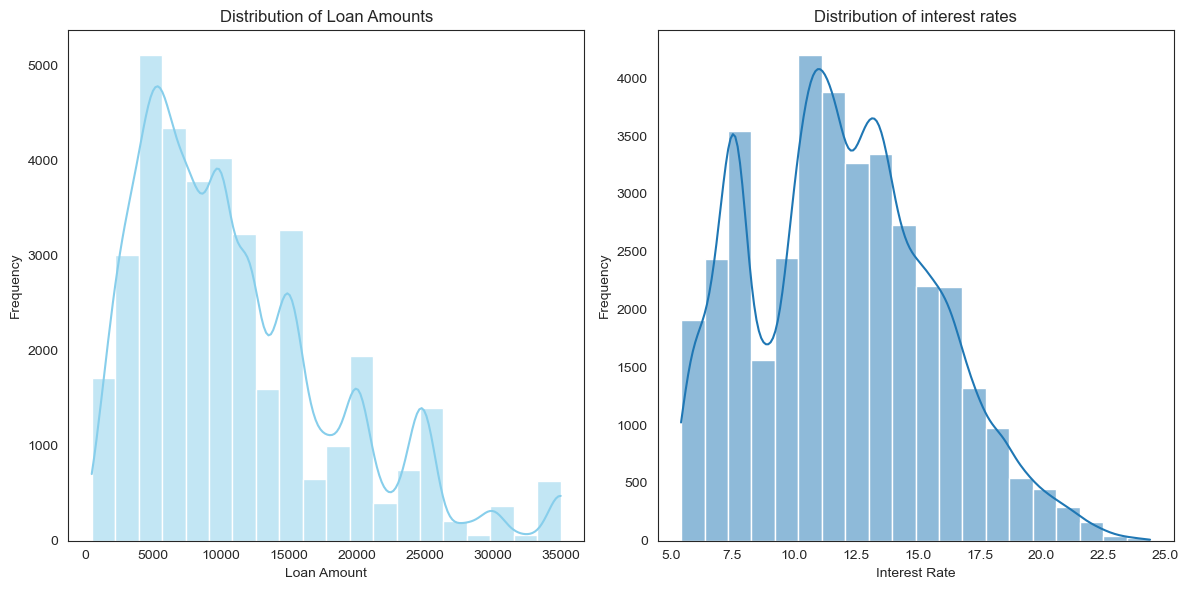

In [29]:
# Perform analysis on the distribution of loan amounts & Interest rates - Quantitative variable
# create a histogram to visualize the distribution of loan amounts & Interest rates
sns.set_style('white')
loan_amount_data = df['loan_amnt']

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram on the first subplot
sns.histplot(loan_amount_data, bins=20, kde=True, color='skyblue', ax=axs[0])
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Loan Amounts')

# Plotting the box plot on the second subplot
#sns.boxplot(loan_amount_data, color='lightcoral', ax=axs[1])
sns.histplot(df['int_rate'], bins=20, kde=True, ax=axs[1])
axs[1].set_xlabel('Interest Rate')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of interest rates')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Insights from above plots
 1. Shape of the histogram is positively (right) skewed, it means there are more small loans, and fewer large loans
 2. The box plot shows that there are a few extreme values in the higher range of loan amounts.
 3. **Range of common loan sizes is between 5k to 15k**
 5. **The interest rate is normally distributed with range betweeb 10%-15%**

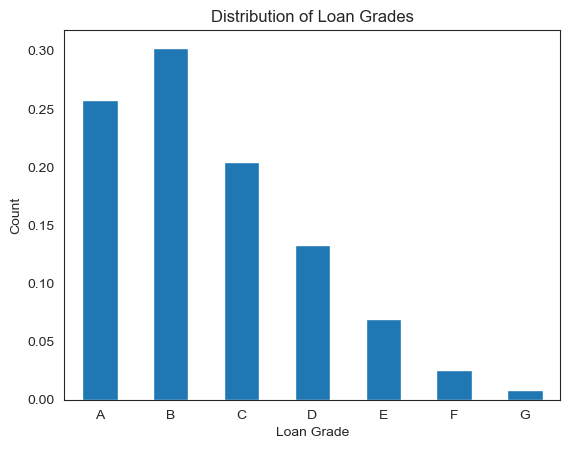

In [30]:
# Perform the analysis on Grade which is Ordered categorical variable
df['grade'].value_counts(normalize=True).sort_index().plot(kind='bar', title='Grade Distribution', rot=0)
plt.xlabel("Loan Grade");
plt.ylabel("Count");
plt.xticks(rotation=0);
plt.title("Distribution of Loan Grades");
plt.show()

## Insights from above plots
1. It's observed that most common loan grade is B and less common loan grade is G
2. Around 30% of loans are having grade B is the higest and 8% for Grade G is in the lowest category

In [31]:
df.groupby('issue_year')['loan_amnt'].count()

issue_year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: loan_amnt, dtype: int64

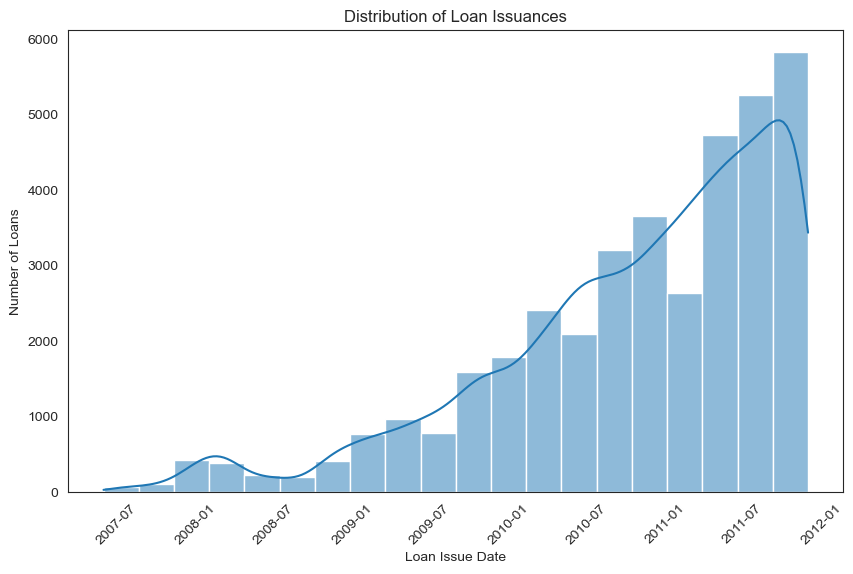

In [32]:
# Perform histogram analysis on loan issue date
plt.figure(figsize=(10, 6))
sns.histplot(df['issue_d'], bins=20, kde=True)
plt.xlabel('Loan Issue Date')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Issuances')
plt.xticks(rotation=45)
plt.show()


## Insights from the above plot
1. **Distribution of loan issues is left skewed - shows the increase number of loans issued over the years.**
2. **The number of loans issued are very minimal in the year 2007 and maximum in 2011.**
3. Also the number of loans issued are always in upward trend year on year


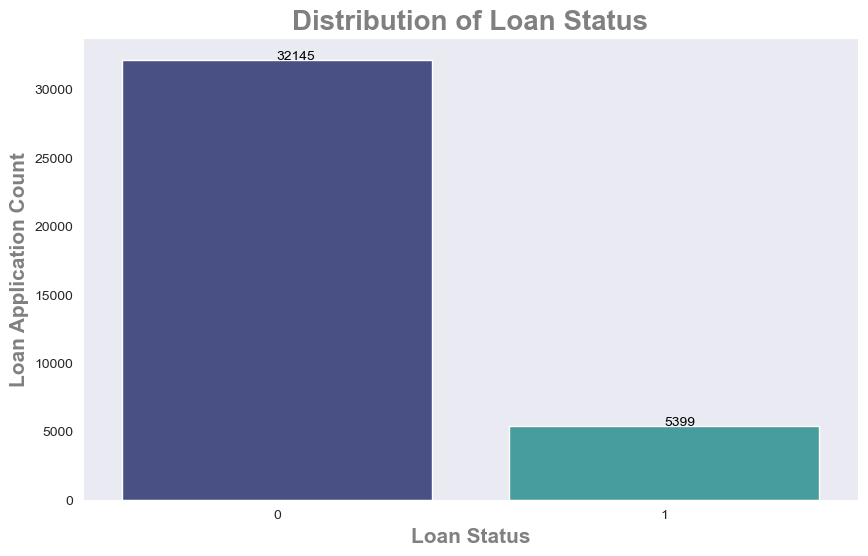

In [33]:
# Perform univariate analysis on ordered categorical variable loan_status column and plot the same.

plt.figure(figsize=(10,6))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=df,palette='mako')
ax.set_title('Distribution of Loan Status',color="grey", fontsize=20, weight='bold')
ax.set_xlabel('Loan Status',color="grey", fontsize=15, weight='bold')
ax.set_ylabel('Loan Application Count',color="grey", fontsize=15, weight='bold')           
# To show count of values above bars
s=df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

plt.show()

## Insights from the above plot
1. Loan Status is an ordered categorical variable with 2 categories.
    0 - Fully Paid, 1 - Charged Off
2. The loan status is highly imbalanced.
3. The number of loans that are fully paid are more than the number of loans that are charged off.

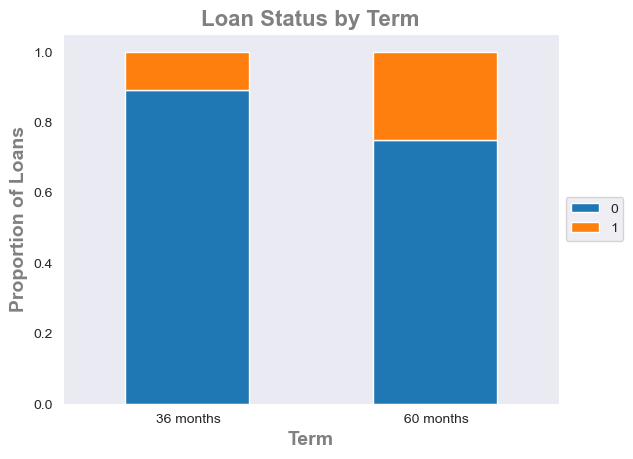

In [35]:
# Same plot with stacked bars of loan status by term
df.groupby('term')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True')
plt.title('Loan Status by Term', fontsize=16, fontweight='bold', color='gray')
plt.xlabel('Term', fontsize=14, fontweight='bold', color='gray')
plt.xticks(rotation=0)
plt.ylabel('Proportion of Loans', fontsize=14, fontweight='bold', color='gray')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Insights from the above Plots
1. Loans with 36 months term are more likely to be fully paid
2. Loans with term of 60 months has a higher count of loan defaults

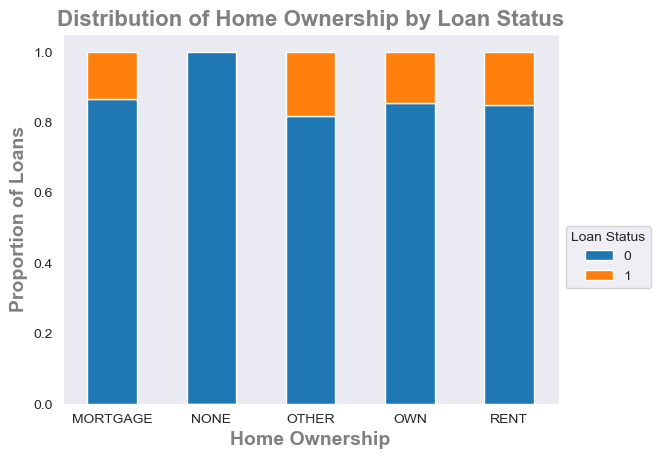

In [36]:
# Analyse the variation of loan status by home ownership
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True')
plt.title('Distribution of Home Ownership by Loan Status', fontsize=16, fontweight='bold', color='grey')
plt.xlabel('Home Ownership', fontsize=14, fontweight='bold', color='grey')
plt.xticks(rotation=0)
plt.ylabel('Proportion of Loans', fontsize=14, fontweight='bold', color='grey')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Loan Status')
plt.show()

## Insights from the above plot
1. Not much difference between the groups, but there is a slightly higher proportion of Fully Paid loans in the Mortgage group.
2. Home Ownership is not the right variable to determine the behavior of loan status 

### Segmented Uni-Variate Analysis

In [37]:
# Segment loan amount into 5 bins and plot against loan status
loan_amnt_bins = [0, 5000, 10000, 15000, 20000, 25000, float('inf')]
loan_amnt_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+']
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=loan_amnt_bins, labels=loan_amnt_labels)
loan_amnt_bins = df.groupby('loan_amnt_bins')['loan_amnt_bins'].count()
# Plot loan amount bins

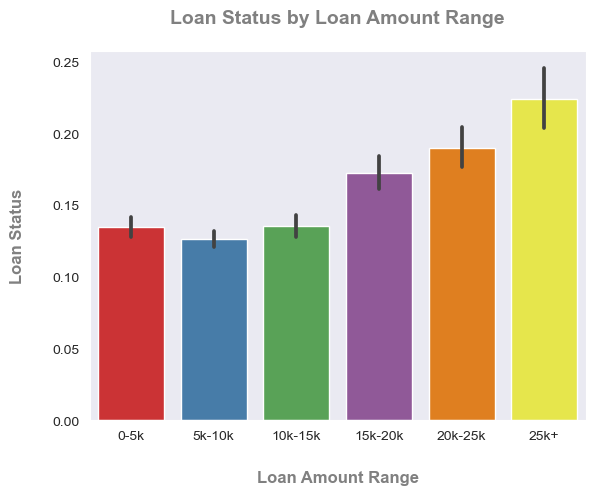

In [38]:
# Perform the segmented analysis of loan amount and loan status

# Barplot of loan status by Loan amount bins
sns.barplot(x='loan_amnt_bins',y='loan_status',data=df,palette='Set1')
plt.xlabel('Loan Amount Range', fontsize=12, fontweight='bold', color = 'grey', labelpad = 20)
plt.ylabel('Loan Status', fontsize=12, fontweight='bold', color = 'grey', labelpad = 20)
plt.title('Loan Status by Loan Amount Range', fontsize=14, fontweight='bold', color = 'grey', pad = 20)
plt.show()

## Insights from the above plot
1. Loan status: 0 - fully paid, 1 - ChargedOff
2. Higher the loan amount, higher the loan charged off rate
3. Significant increase in default rate from 15k to 20k loan amount
4. **Default rate is higher for loans greater than 20k**
5. Default rate is lower for loans less than 15k

In [39]:
# Segment annual income into 5 groups and plot the loan status for each group

# Define the annual income ranges
annual_income_ranges = [0, 50000, 100000, 150000, 200000, 250000, 1000000000]
annual_income_ranges_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k+']
df['annual_income_range'] = pd.cut(df['annual_inc'], annual_income_ranges, labels=annual_income_ranges_labels)

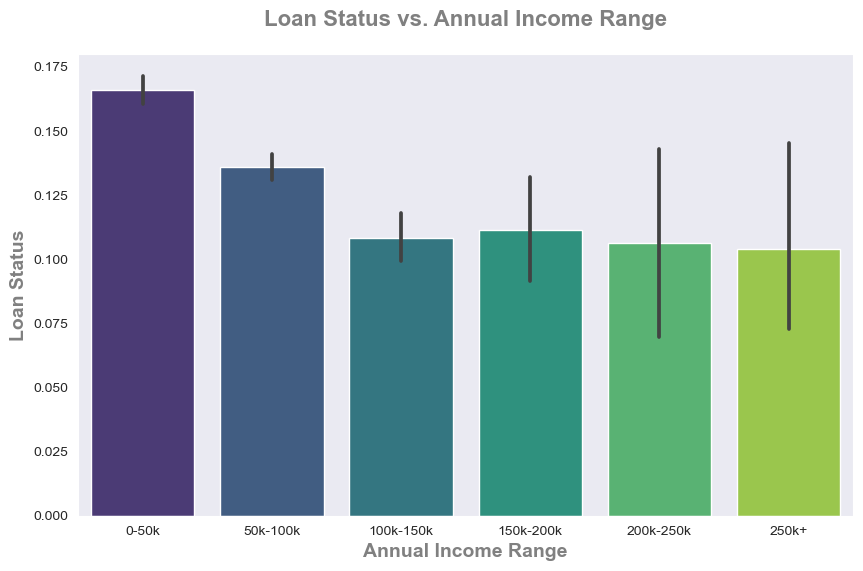

In [40]:
# Barplot of annual income range vs. loan status
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_income_range', y='loan_status', data=df, palette='viridis')
plt.title('Loan Status vs. Annual Income Range', fontsize=16, fontweight='bold', pad=20, color='grey', loc='center')
plt.xlabel('Annual Income Range', fontsize=14, fontweight='bold', color='grey')
plt.ylabel('Loan Status', fontsize=14, fontweight='bold', color='grey')
plt.xticks(rotation=0)
plt.show()

## Insights from the above plot
1. Loan status: 0 - fully paid, 1 - ChargedOff
2. **Lower income range has more probability of defaulting on loan**
3. **Income range of 0-50k are the most probale loan defaulters**
2. 250k+ income range has the highest probability of paying off loan

In [41]:

int_rate_ranges = [0,5,10,15,20,25,30]
int_rate_ranges_labels = ['0-5', '5-10', '10-15', '15-20', '20-25','25+']
df['int_rate_range'] = pd.cut(df['int_rate'], int_rate_ranges, labels=int_rate_ranges_labels)


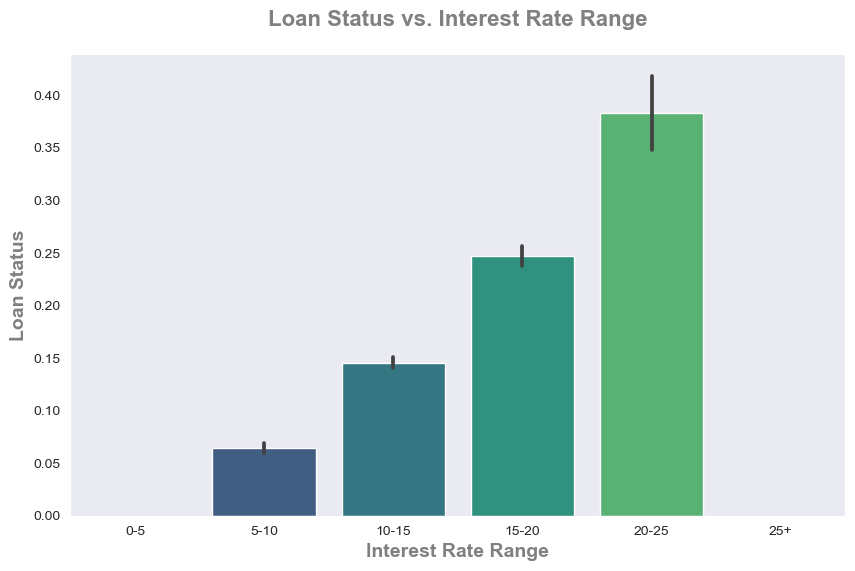

In [42]:
# Barplot of interest rate range vs. loan status
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate_range', y='loan_status', data=df, palette='viridis')
plt.title('Loan Status vs. Interest Rate Range', fontsize=16, fontweight='bold', pad=20, color='grey', loc='center')
plt.xlabel('Interest Rate Range', fontsize=14, fontweight='bold', color='grey')
plt.ylabel('Loan Status', fontsize=14, fontweight='bold', color='grey')
plt.xticks(rotation=0)
plt.show()

# Interest rate range falls between 20% and 25% have the highest default rate

## Insights from the above plot
1. The higher the interest rate, the higher the chance of defaulting on the loan.
2. Majority of loans with interest rates above 15% are charged off.
3. **Interest rate range falls between 20% and 25% have the highest default rate**

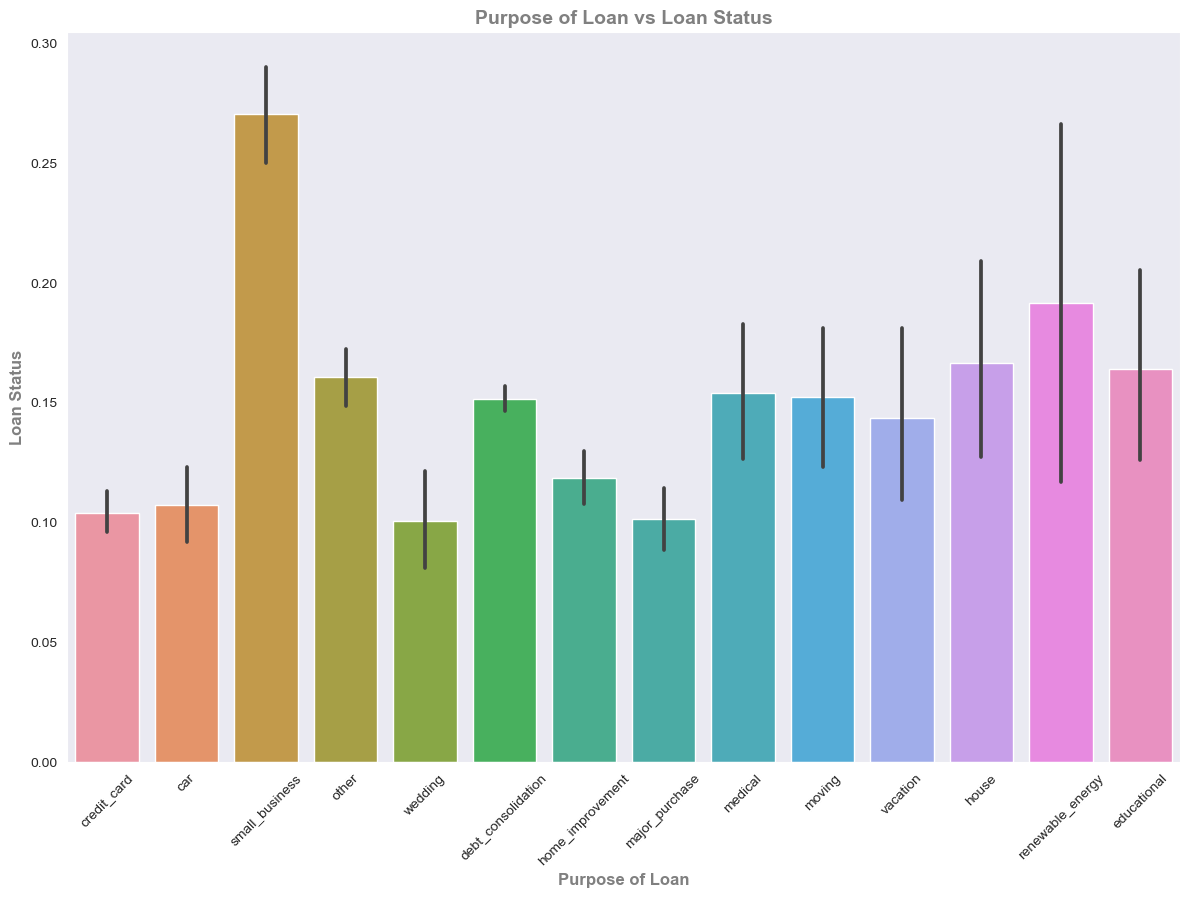

In [43]:
# Perform analysis on the purpose of loan
plt.figure(figsize=(12, 8))
#horizontal bar plot
sns.barplot(x='purpose',y='loan_status', data=df)
plt.tight_layout()
plt.xlabel('Purpose of Loan', fontsize=12, weight = 'bold', color='grey')
plt.xticks(rotation=45)
plt.ylabel('Loan Status', fontsize=12, weight = 'bold', color='grey')
plt.title('Purpose of Loan vs Loan Status', fontsize=14, weight = 'bold', color='grey')
plt.show()


## Insights from the above plot
1. **Small business loans have the highest default rate**
2. **Educational loans have the lowest default rate**
3. Debt consolidation loans have the highest number of loans

In [44]:
# Take the 4 main purposes of loans and apply the plots.
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

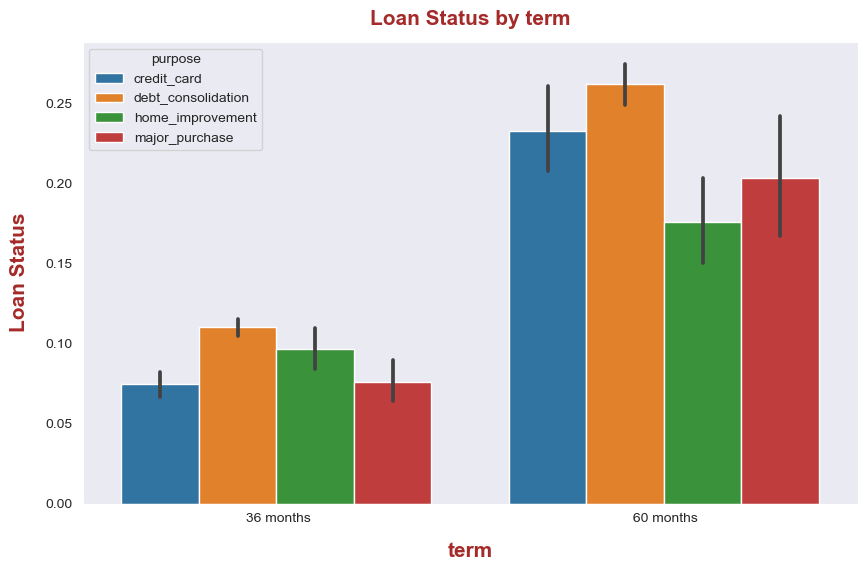

In [45]:
# Plot the distribution of loan_status by term
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df, order=sorted(df[cat_var].unique()))
    plt.xlabel(cat_var, size=15, labelpad=12, color='brown', fontweight='semibold', fontname='Arial')
    plt.ylabel('Loan Status', size=15, labelpad=12, color='brown', fontweight='semibold', fontname='Arial')
    plt.title('Loan Status by ' + cat_var, size=15, pad=12, color='brown', fontweight='semibold', fontname='Arial')
    plt.show()

plt.figure(figsize=(10, 6)) 
plot_segmented('term')

## Insights from above plot
1. **Loan charged off rate is higher for 60 months term loans than 36 months term**
2. The loan_status is more likely to be charged off for debt_consolidation than other purposes

In [46]:
# Check the distribution of number of loans across grades
df['grade'].value_counts(normalize=True)*100
# There are more loans with grades A, B and C

B   30.42
A   24.84
C   20.52
D   13.57
E    7.25
F    2.63
G    0.76
Name: grade, dtype: float64

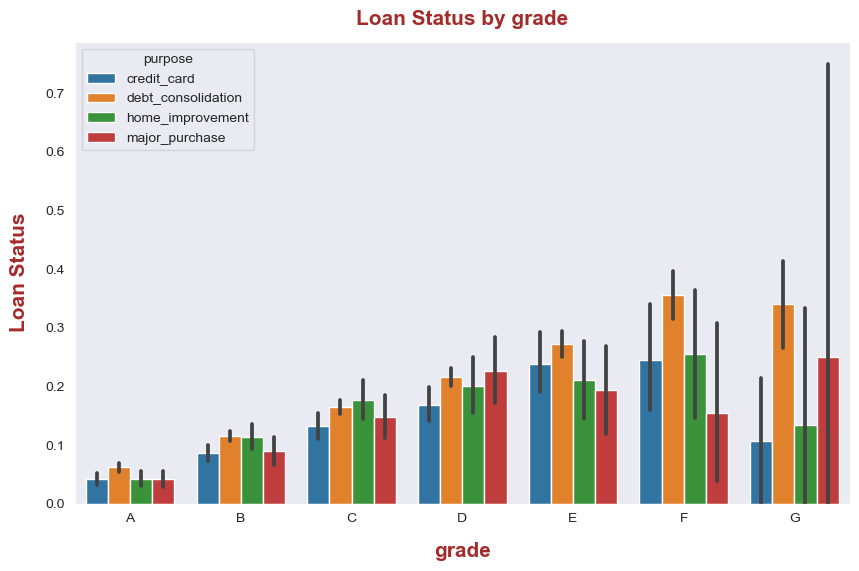

In [47]:
# Plot the segmented distribution of grade for each loan status
plt.figure(figsize=(10, 6))
plot_segmented('grade')

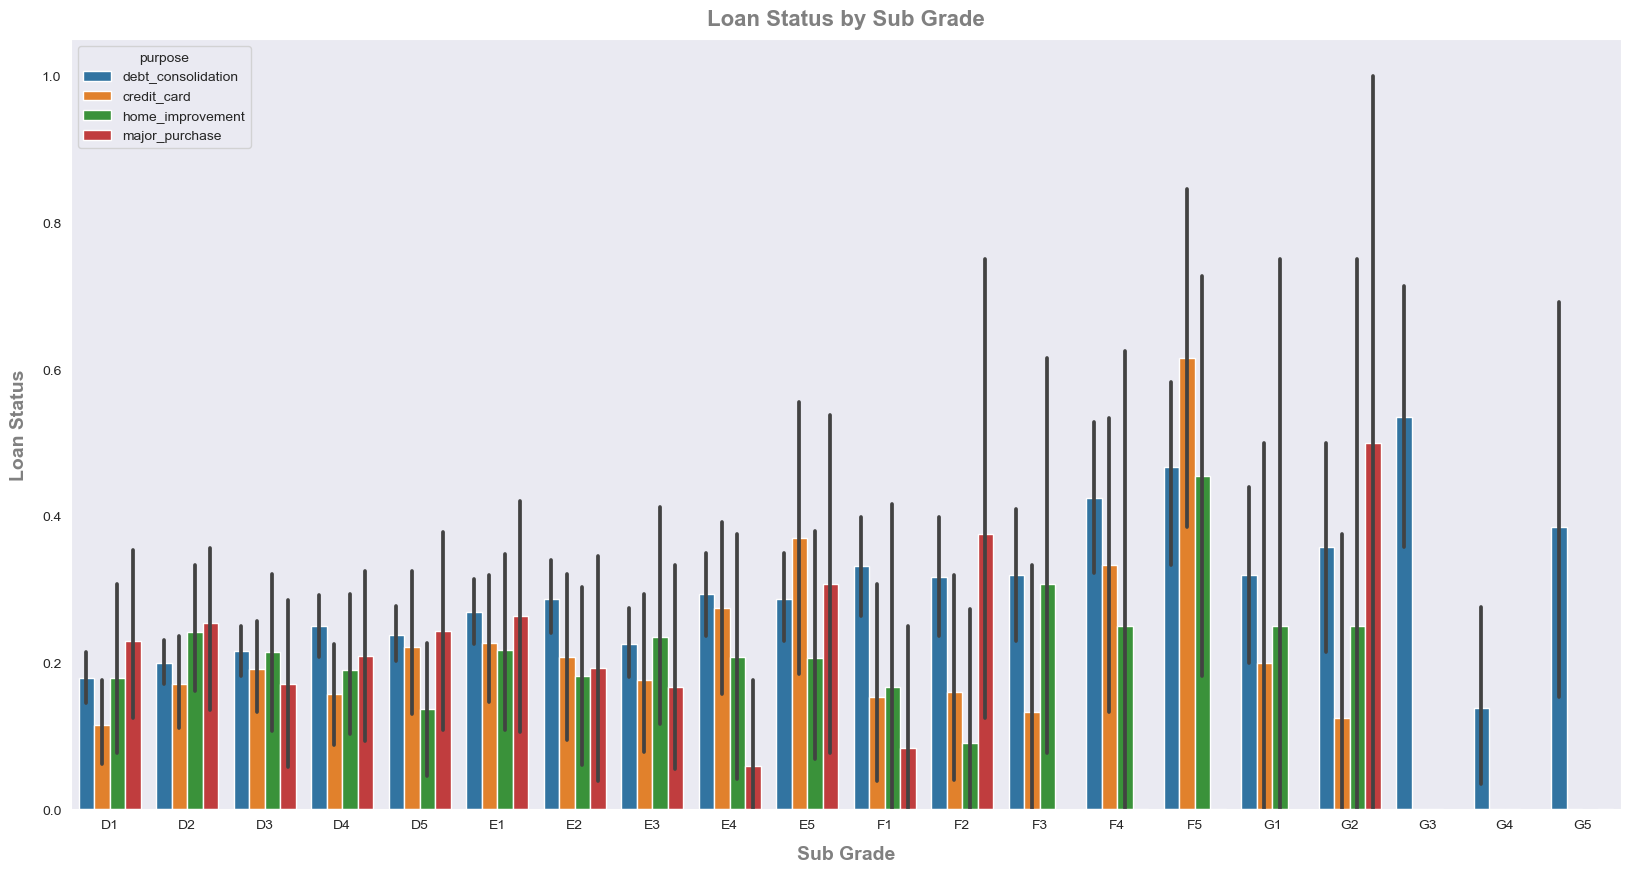

In [48]:
# Perform distribution of loan status using subgrades  based on the above analysis on higher loan grades D,E,F,G
subgrad_df=df[df.grade.isin(['D','E', 'F', 'G'])]
plt.figure(figsize=(20,10))
sns.barplot(x='sub_grade',y='loan_status',data=subgrad_df, hue='purpose',order=sorted(subgrad_df['sub_grade'].unique()))
plt.xlabel('Sub Grade', fontsize=14, weight = 'bold', color = 'grey', labelpad = 10)
plt.ylabel('Loan Status', fontsize=14, weight = 'bold', color = 'grey', labelpad = 10)
plt.title('Loan Status by Sub Grade', fontsize=16, weight = 'bold', color = 'grey', pad = 10)
plt.show()

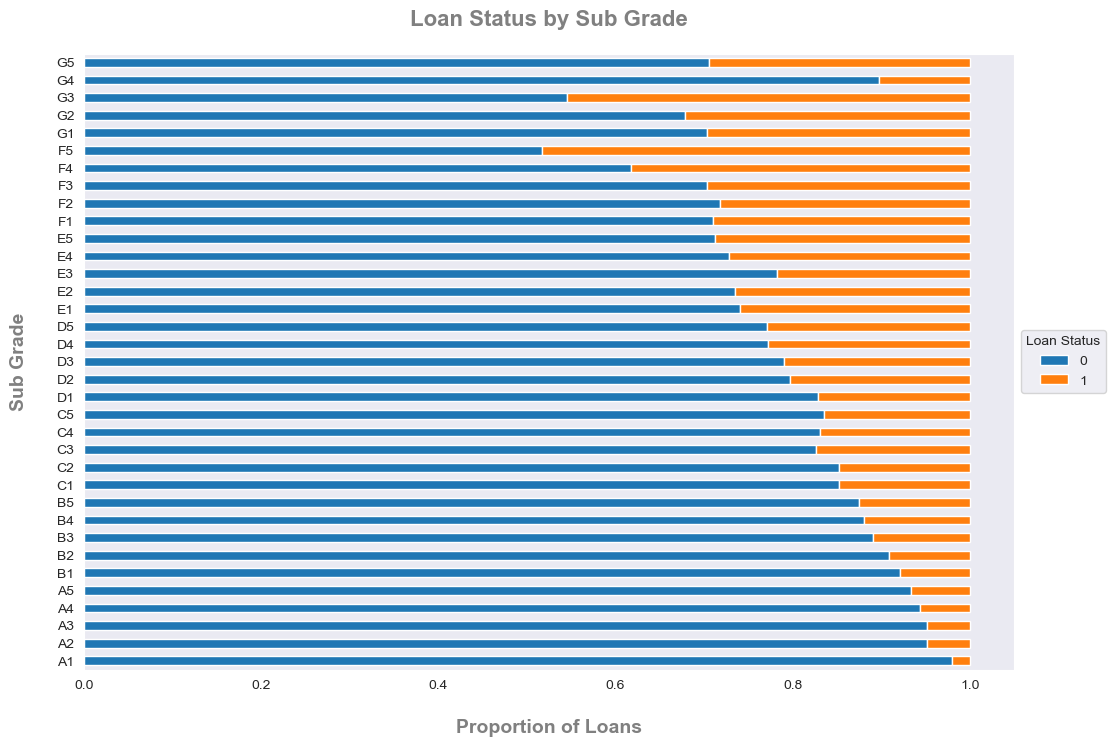

In [49]:
# Stacked bar chart of loan status by sub grade
df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().plot.barh(stacked=True, figsize=(12,8), sort_columns=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Loan Status by Sub Grade', fontsize=16, fontweight='bold', pad=20, color='grey')
plt.xlabel('Proportion of Loans', fontsize=14, labelpad=20, color='grey', fontweight='bold')
plt.ylabel('Sub Grade', fontsize=14, labelpad=20, color='grey', fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Loan Status')
plt.show()

## Insights from the above plots
1. Loan default rate is higher for higher loan grades
2. As the grade of the loan decreases [A,B,C,D,E,F,G], chances of loan getting defaulted increases
3. Loan default rate is higher for the loans taken for debt_consolidation purpose under Grades F & G.
4. Loans with sub grade F5 taken for credit_card purpose are having higher default rate.
5. **Loans with sub grade F5 is having highest default rate around 48%**
6. Grade A has the lowest default rate, Grade G has the highest default rate


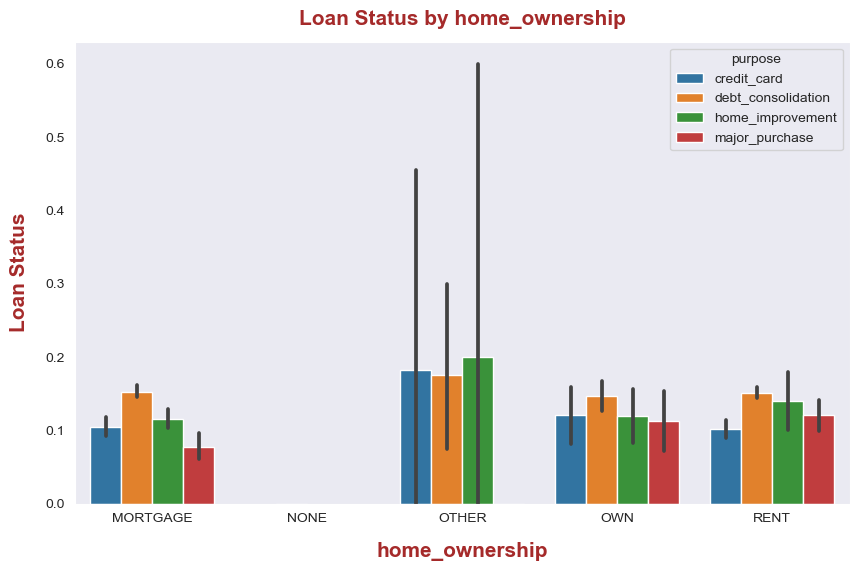

In [50]:
# Author: Ravi Krishna Yammanuru
plt.figure(figsize=(10, 6)) 
plot_segmented('home_ownership')
# No visible difference between the groups
# 

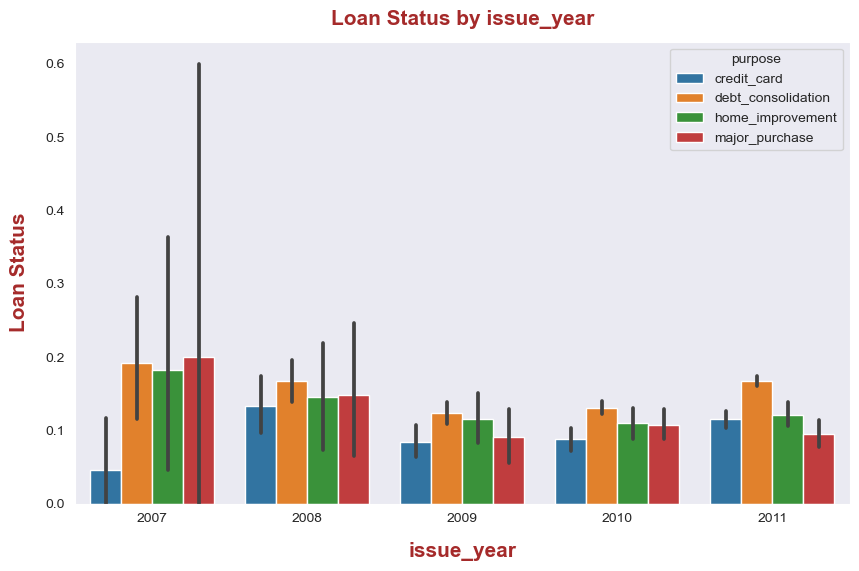

In [51]:
# Author: Ravi Krishna Yammanuru
# Visualize variance of loan status by issue year
plt.figure(figsize=(10, 6)) 
plot_segmented('issue_year')

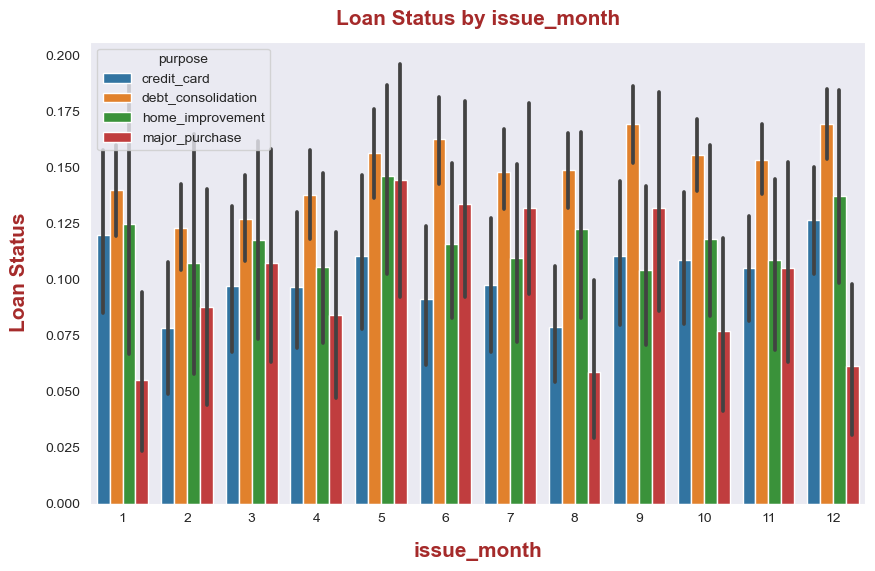

In [52]:
# Visualize variance of loan status by issue month
plt.figure(figsize=(10, 6)) 
plot_segmented('issue_month')

## Insights from the above plots
1. No visible difference of loan statuses for home_ownership, issue_year and issue_month over the purpose of loan taken
2. These variables are not the good indicators of deriving loan_status over loan purpose


## Bivariate Analysis

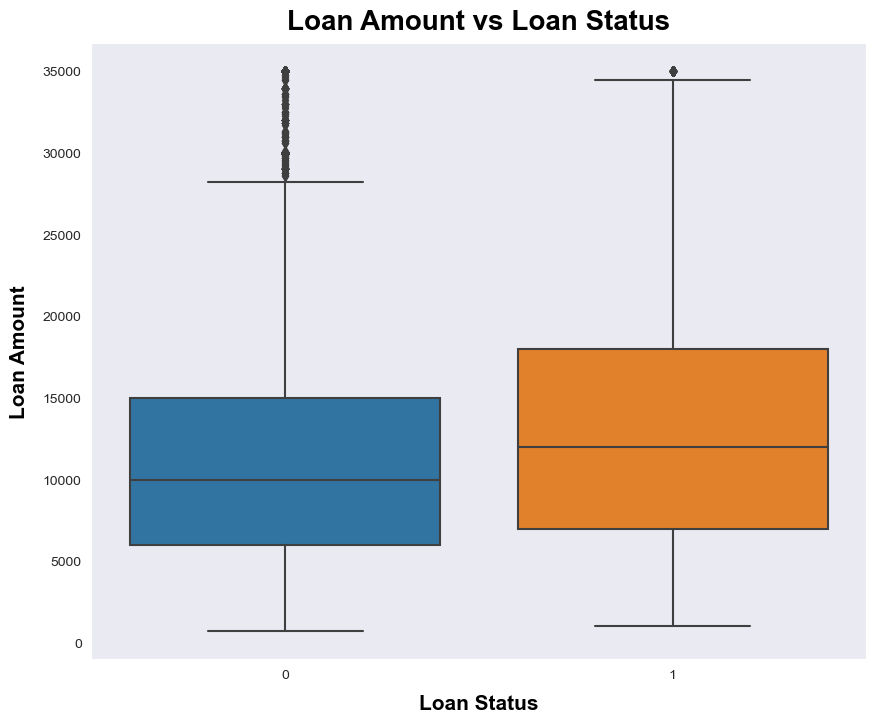

In [53]:
# perform bivariate analysis on loan amount and loan status

loan_amount_data = df['loan_amnt']
loan_status_data = df['loan_status']

# create a new dataframe with loan amount and loan status
loan_amount_status_df = pd.concat([loan_amount_data, loan_status_data], axis=1)
loan_amount_status_df.head()

# create a boxplot to see the distribution of loan amount
plt.figure(figsize=(10, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_amount_status_df)
plt.xlabel('Loan Status', fontsize=15, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Loan Amount', fontsize=15, fontweight='bold', color='black', labelpad=10)
plt.title('Loan Amount vs Loan Status', fontsize=20, fontweight='bold', color='black', pad=10)
plt.show()

## Insights from the above plot
1. It can be seen that people who have defaulted have taken a higher loan amount than people who have not defaulted
2. The maximum loan amount for customers who have defaulted is around 40,000
3. **It can be seen that the range of loan amount for charged off loans is higher than the range of loan amount for fully paid loans**

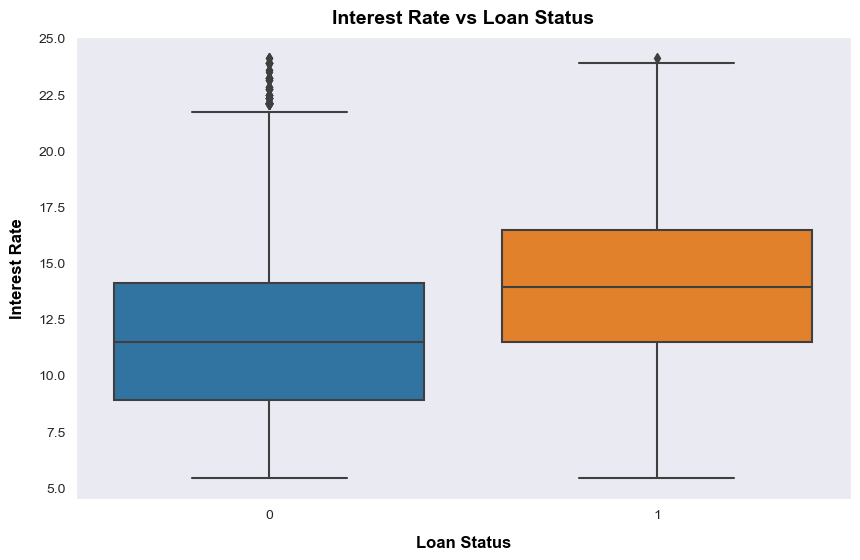

In [54]:
# Interest rate vs Loan status
plt.figure(figsize=(10,6))
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df)
plt.xlabel('Loan Status', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Interest Rate', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.title('Interest Rate vs Loan Status', fontsize=14, fontweight='bold', color='black', pad=10 )
plt.show()

## Insights from the above plot
1. **Most of the loans that are charged off have higher interest rates**
2. Most of the loans that are fully paid have lower interest rates
3. The median interest rate for charged off loans is higher than the median interest rate for fully paid loans

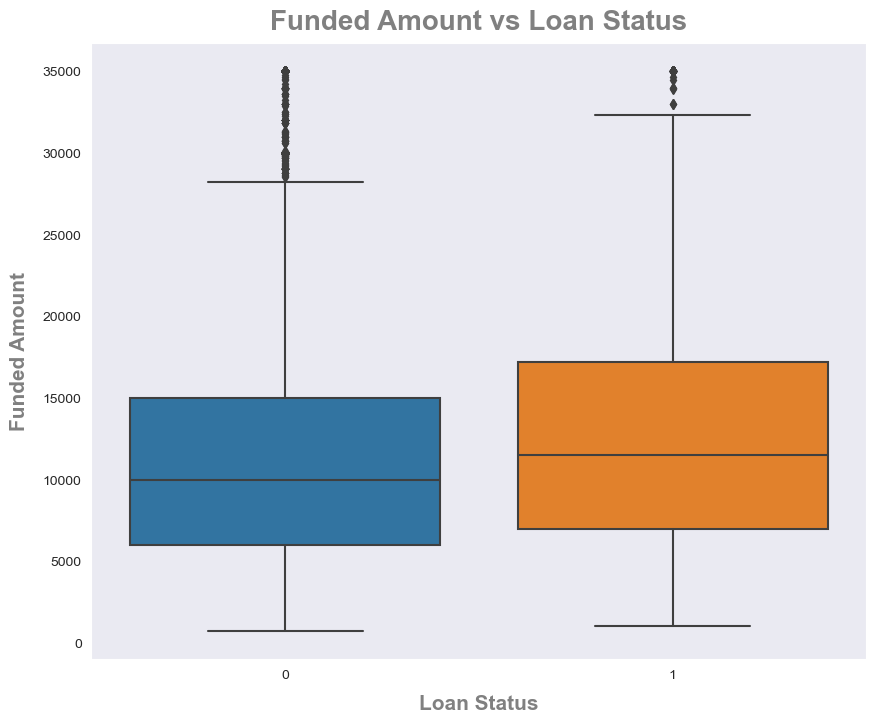

In [55]:

funded_amount_data = df['funded_amnt']
loan_status_data = df['loan_status']

# create a new dataframe with loan amount and loan status
funded_amount_status_df = pd.concat([funded_amount_data, loan_status_data], axis=1)
funded_amount_status_df.head()

# create a boxplot to see the distribution of loan amount
plt.figure(figsize=(10, 8))
sns.boxplot(x='loan_status', y='funded_amnt', data=funded_amount_status_df)
plt.xlabel('Loan Status', fontsize=15, fontweight='bold', color='grey', labelpad=10)
plt.ylabel('Funded Amount', fontsize=15, fontweight='bold', color='grey', labelpad=10)
plt.title('Funded Amount vs Loan Status', fontsize=20, fontweight='bold', color='grey', pad=10)
plt.show()

## Insights from the above plot
1. **The median funded amount for charged off loans is higher than that of fully paid loans.**
2. This could be because the loan amount is higher for charged off loans.

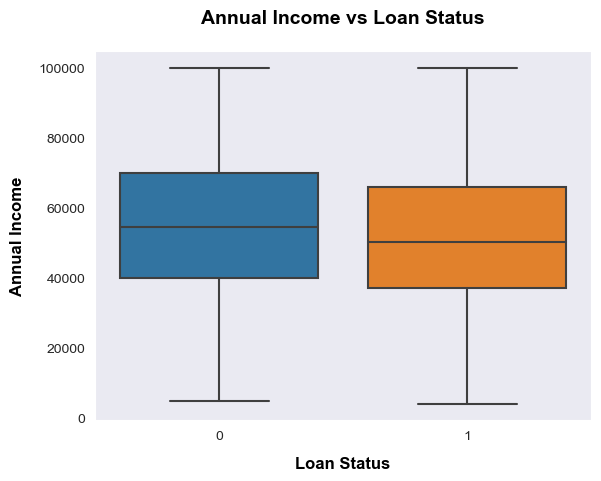

In [72]:
# Filter the outliers in annual income with criteria less than 100000 to filer outliers

temp = df[df['annual_inc'] < 100000]
sns.boxplot(x='loan_status', y='annual_inc', data=temp)
plt.title('Annual Income vs Loan Status', fontsize=14, fontweight='bold', color='black', pad=20)
plt.xlabel('Loan Status', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Annual Income', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.show()


## Insight from the above plot
1. **The boxplot shows that the annual income of the charged off loans is lower than the fully paid loans**
2. Median annual income of defaulted loans is less than fully paid loans

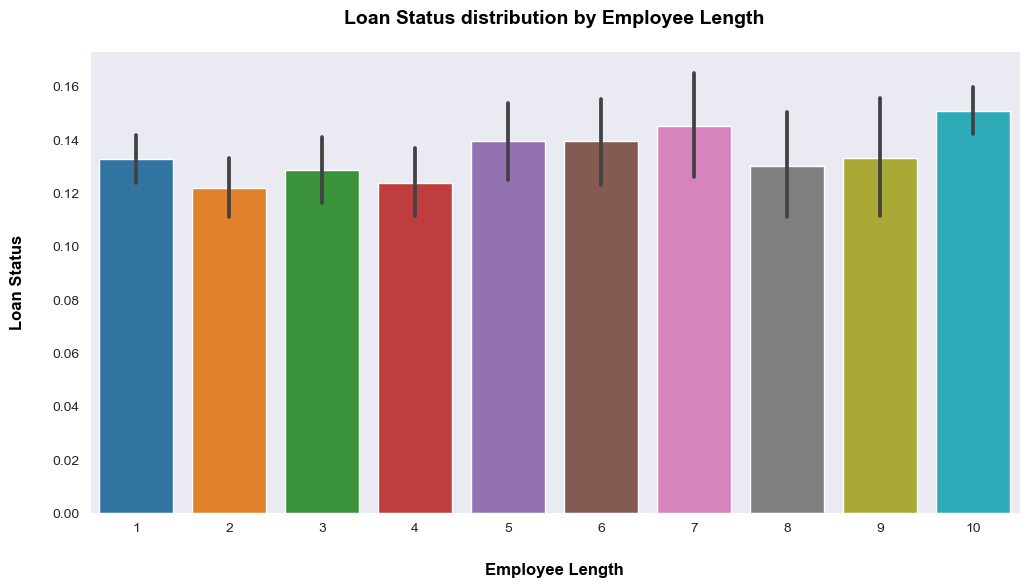

In [58]:
# Plot employee length vs. loan status
plt.figure(figsize=(12, 6))
sns.barplot(x='emp_length', y='loan_status', data=df)
plt.xlabel('Employee Length', fontsize=12, fontweight='bold', color='black', labelpad=20)
plt.ylabel('Loan Status', fontsize=12, fontweight='bold', color='black', labelpad=20)
plt.title('Loan Status distribution by Employee Length', fontsize=14, fontweight='bold', color='black', pad=20)
plt.show()
# Not much difference in loan status by employee length 

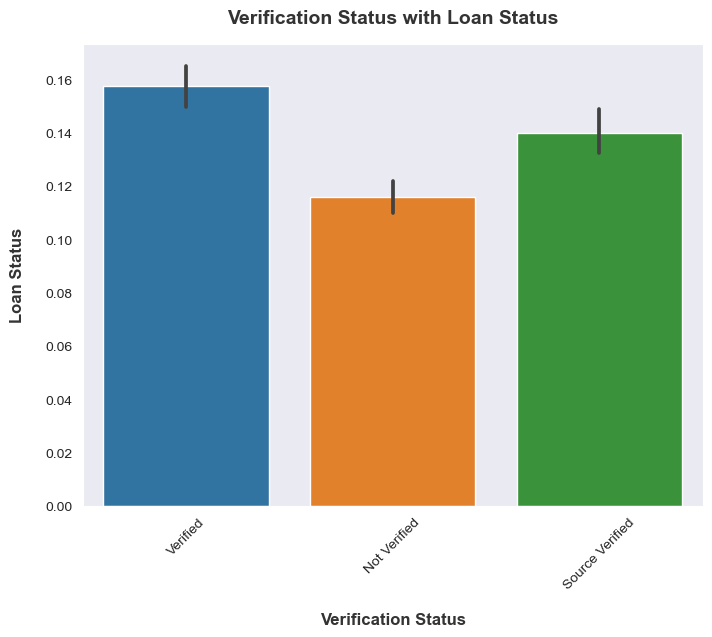

In [59]:
# Perform the analysis on the ordered categorical variable verification_status
# Distribution of issued loans across the income verification status

# Assuming you have columns named 'verification_status' and 'loan_status' in your dataset
verification_status_data = df['verification_status']
loan_status_data = df['loan_status']

# Create a count plot with hue
plt.figure(figsize=(8, 6))
sns.barplot(x=verification_status_data, y=loan_status_data, data=df)
plt.xlabel('Verification Status', fontsize=12, fontweight='bold', labelpad=15, color='#333333')
plt.ylabel('Loan Status', fontsize=12, fontweight='bold', labelpad=15, color='#333333')
plt.title('Verification Status with Loan Status', fontsize=14, fontweight='bold', pad=15, color='#333333')
plt.xticks(rotation=45)
plt.show()

## Insights from the above plot
Surprisingly, verified loans have a higher rate of default than unverified loans.

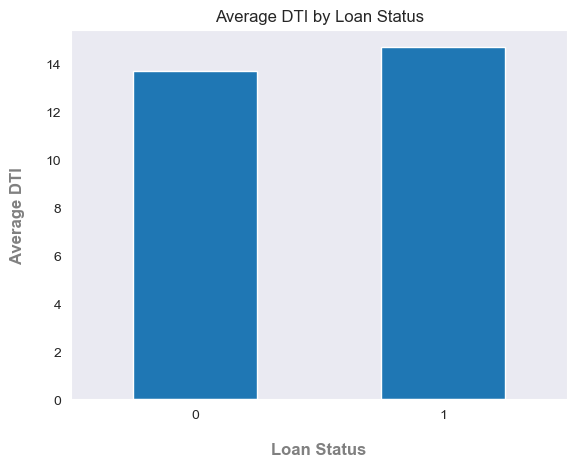

In [60]:
df.groupby('loan_status')['dti'].mean().plot(kind='bar', title='Average DTI by Loan Status')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold', labelpad=15, color='gray')
plt.xticks(rotation=0)
plt.ylabel('Average DTI', fontsize=12, fontweight='bold', labelpad=15, color='gray')
plt.show()

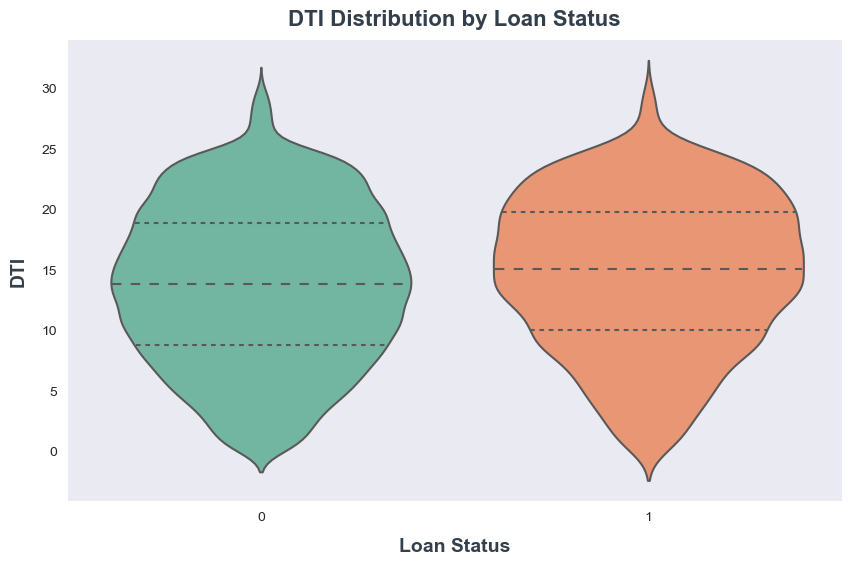

In [61]:

dti_data = df['dti']
loan_status_data = df['loan_status']

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=loan_status_data, y=dti_data, palette='Set2', inner='quartile')
plt.xlabel('Loan Status', fontsize=14, fontweight='bold', labelpad=10, color='#333F4B')
plt.ylabel('DTI', fontsize=14, fontweight='bold', labelpad=10, color='#333F4B')
plt.title('DTI Distribution by Loan Status', fontsize=16, fontweight='bold', pad=10, color='#333F4B')
plt.xticks(rotation=0)
plt.show()


## Insights from the above plots
1. **Mean DTI is higher for charged off loans**
2. **The median DTI for charged off loans is higher than that of fully paid loans**
3. The distribution of DTI for charged off loans is wider than that of fully paid loans

## MultiVariate Analysis

In [62]:
# Perform a correlation analysis on the data
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,mths_since_last_delinq,pub_rec_bankruptcies,issue_year,issue_month
loan_amnt,1.00,0.98,0.94,0.32,0.93,0.16,0.25,0.07,0.07,0.02,-0.04,0.12,0.06
funded_amnt,0.98,1.00,0.96,0.33,0.95,0.16,0.24,0.06,0.07,0.02,-0.04,0.13,0.05
funded_amnt_inv,0.94,0.96,1.00,0.32,0.90,0.17,0.23,0.05,0.07,0.07,-0.04,0.26,0.07
int_rate,0.32,0.33,0.32,1.00,0.29,0.01,0.05,0.21,0.12,-0.05,0.09,0.05,0.03
installment,0.93,0.95,0.90,0.29,1.00,0.13,0.24,0.03,0.06,0.00,-0.03,0.06,0.03
emp_length,0.16,0.16,0.17,0.01,0.13,1.00,0.10,0.02,0.04,0.04,0.06,0.10,0.02
annual_inc,0.25,0.24,0.23,0.05,0.24,0.10,1.00,-0.04,-0.14,-0.00,-0.01,0.01,0.00
loan_status,0.07,0.06,0.05,0.21,0.03,0.02,-0.04,1.00,0.05,0.02,0.05,0.03,0.02
dti,0.07,0.07,0.07,0.12,0.06,0.04,-0.14,0.05,1.00,0.06,0.00,0.08,0.01
mths_since_last_delinq,0.02,0.02,0.07,-0.05,0.00,0.04,-0.00,0.02,0.06,1.00,0.03,0.14,0.06


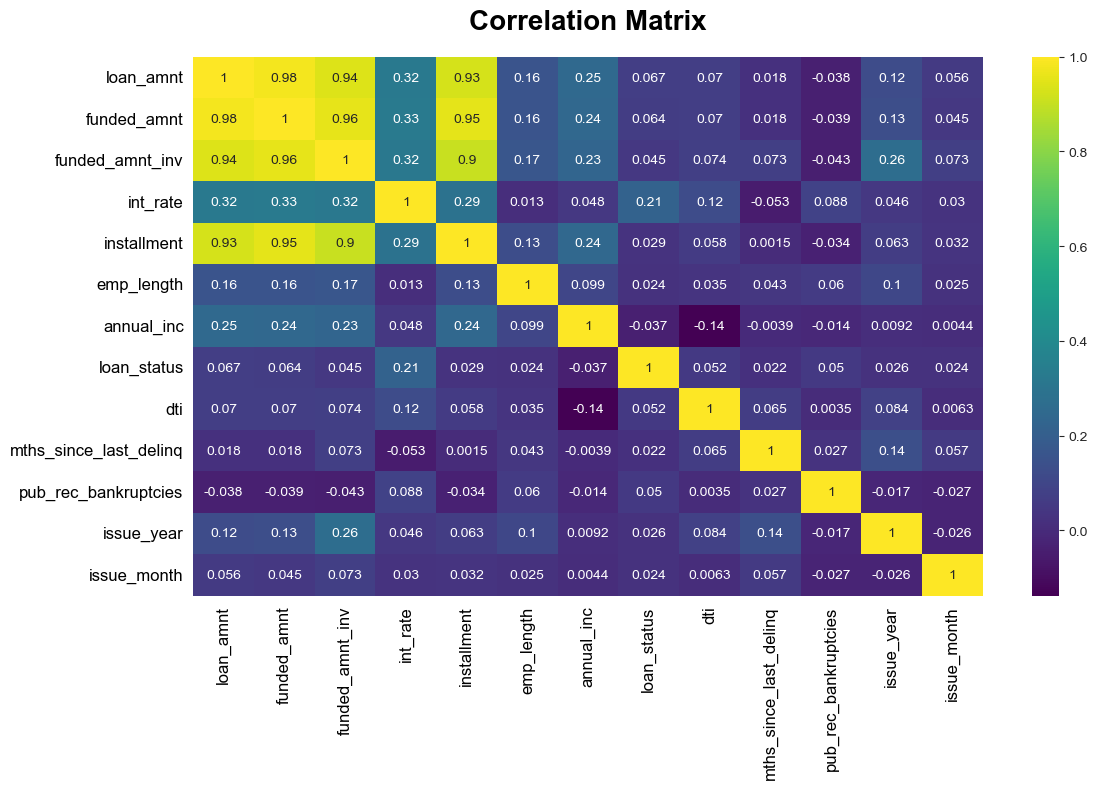

In [63]:
# Perform heatmap on the correlation matrix of the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix', fontsize=20, fontweight='bold', pad=20, loc='center', color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.tight_layout()
plt.show()

# Insights from the above plot
1. **Loan status is highly correlated with int_rate**
2. Loan status is moderately correlated with loan amount, funded amount, installment
3. **Loan status is least correlated with annual income**
4. Loan amount and funded amount are highly correlated
5. Loan amount and funded amount are highly correlated with installment

<Figure size 1000x1000 with 0 Axes>

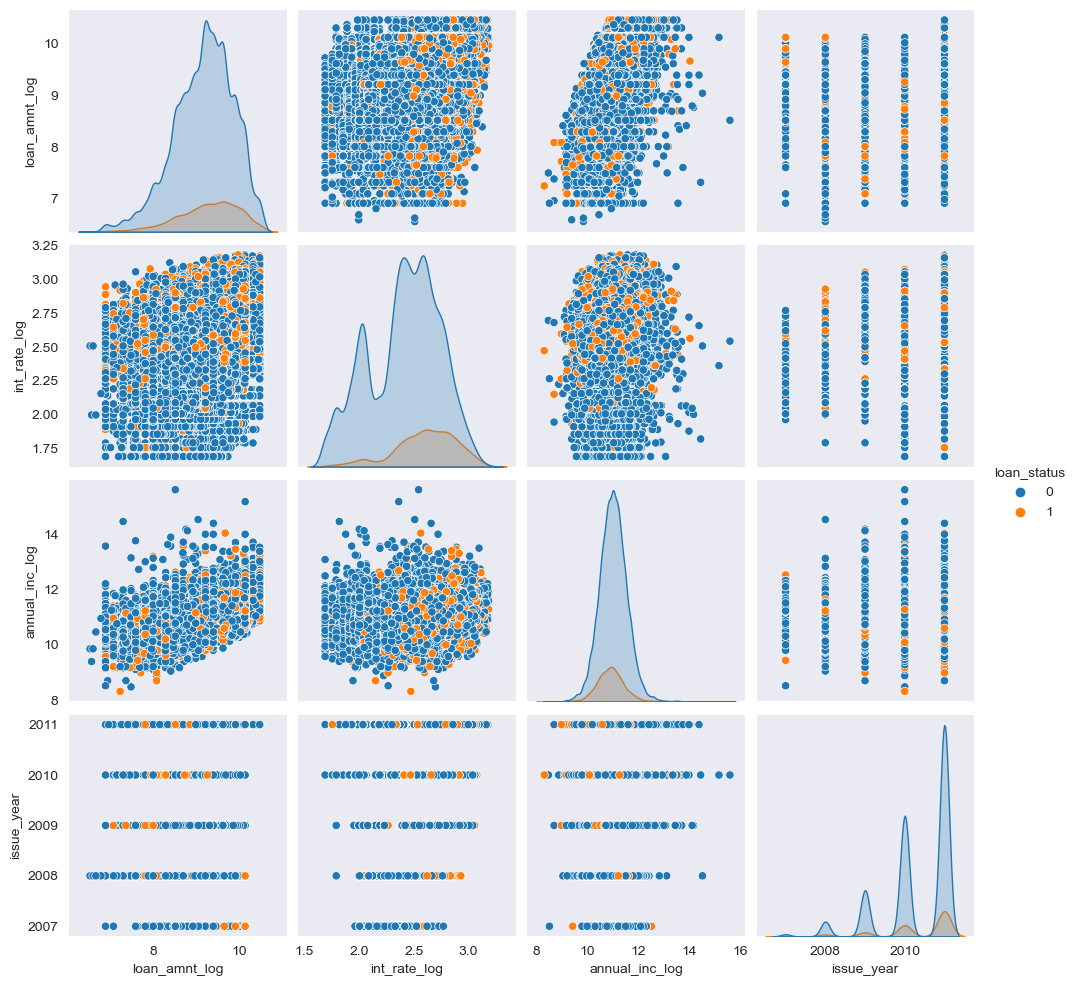

In [64]:
# Multivariate analysis
# Pairplot between loan_amnt, int_rate, annual_inc, issue_yeat, loan_status

loan_pair = df[['loan_amnt', 'int_rate', 'annual_inc', 'issue_year', 'loan_status']]
loan_pair.head()

# log transformation
loan_pair['loan_amnt_log'] = np.log(loan_pair['loan_amnt'])
loan_pair['int_rate_log'] = np.log(loan_pair['int_rate'])
loan_pair['annual_inc_log'] = np.log(loan_pair['annual_inc'])

loan_pair.head()

# pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(loan_pair, hue='loan_status', vars=['loan_amnt_log', 'int_rate_log', 'annual_inc_log', 'issue_year'])
plt.show()

<Figure size 1200x800 with 0 Axes>

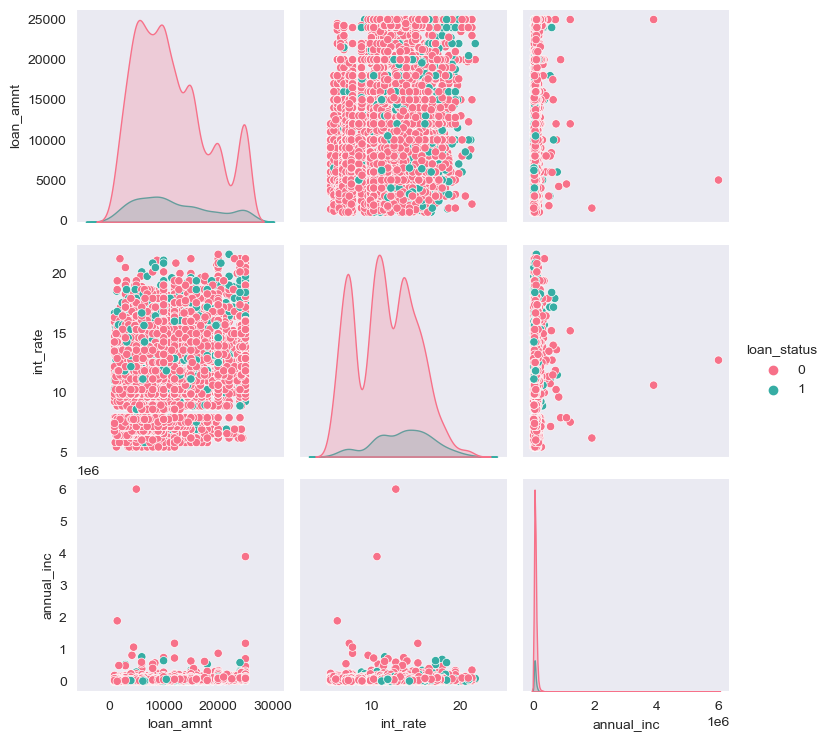

In [65]:
# Perform Pair plot analysis for the year 2010
plt.figure(figsize=(12,8))
sns.pairplot(df[df['issue_year'] == 2010], hue='loan_status', vars=['loan_amnt', 'int_rate', 'annual_inc'], palette='husl')
plt.show()

## Insights from the above plots
1. **Loan amount is higher for charged off loans**
2. **Interest rate is higher for charged off loans**
3. Annual income is higher for higher loan amount
4. **The pair plot analysis for the year 2010 shows that the loan amount is higher for the people who have defaulted the loan. The interest rate is also higher for the people who have defaulted the loan. The annual income is lower for the people who have defaulted the loan.**

## **Conclusion**
#### **Continuous Variables:**
1. LOAN_AMOUNT : Default rate is higher for the higher loan amounts. Loan amount greater than 15000 dollors have higher default rate
2. FUNDED_AMOUNT : Funded amount greater than 15000 dollors have higher default rate. The median funded amount for charged off loans is higher than that of fully paid loans
3. FUNDED_AMOUNT_INVESTED : Funded amount invested greater than 15000 dollors have higher default rate
4. INTEREST_RATE : Higher the interest rate, higher the chance of defaulting on the loan. Loans with int rate falling between 20% and 25% have the highest default rate
5. ANNUAL_INCOME : Lower income range has more probability of defaulting on loan. Income range of 0-50k are the most probale loan defaulters
6. DTI : As dti increase the default rate increases. Mean value of DTI is greater for charged off loans
#### **Categorical Variables:**
1. TERM : Loan charged off rate is higher for 60 months term loans than 36 months term
2. GRADE : As the grade of the loan decreases [A,B,C,D,E,F,G], chances of loan getting defaulted increases
3. SUB_GRADE : As the Sub Grade decreases (A1 A2 B1 B2.....) default rate increases. Loans with sub grade F5 is having highest default rate around 48%
4. VERIFICATION STATUS : Percent of loan defaulted is higher for verifed borrowers
5. PURPOSE : Small business loans have the highest default rate
#### **Variables having no or minimal impact on loan status**
1. home_ownership
2. Issue_d
3. emp_length
#### Other observations
1. **Loan status is highly correlated with int_rate**
2. Loan status is moderately correlated with loan amount, funded amount, installment
3. **Loan status is least correlated with annual income**
4. Loan amount and funded amount are highly correlated
5. Loan amount and funded amount are highly correlated with installment